# Google Analytics Revenue Prediction

## Model 5-1

**Environment**

In [50]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
 
# Make jupyter bigger
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
from myfunctions import *

**Import Dataframe**

In [9]:
df_downsampled = pd.read_csv("data/df5_1-downsampled.csv", low_memory=False)

### Model Improvement

In [5]:
df_downsampled.shape

(23030, 50)

In [6]:
df_downsampled.head()

,channel_direct,channel_organic,channel_other,channel_paid,browser_android,browser_chrome,browser_firefox,browser_microsoft,browser_other,cat_desktop,cat_mobile,os_Android,os_Macintosh,os_Windows,os_iOS,continet_Africa,continet_Americas,continet_Asia,continet_Europe,continet_Oceania,ad_GoogleMerchandiseCollection,ad_NoAd,network_Google Search,network_NoAdWords,campaign_AW,campaign_Data Share,campaign_NoCampaign,medium_affiliate,medium_cpc,medium_cpm,medium_none,medium_organic,medium_other,referral_Google,referral_Home,referral_NoReferral,referral_Youtube,source_Google,source_Googleplex,source_Youtube,source_direct,visitNumber,deviceIsMobile,totalsBounces,totalsNewVisits,totalsPageviews,adwordsClickGclId,trafficSourceIsTrueDirect,newRandom,newConversion
0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2,1,0,0,7,0,0,0.722360,0
1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0.062462,0
2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,1,1,0,0,0.041381,0
3,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0.452090,0
4,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,0.542287,0


In [7]:
df_downsampled.columns

Index(['channel_direct', 'channel_organic', 'channel_other', 'channel_paid',
       'browser_android', 'browser_chrome', 'browser_firefox',
       'browser_microsoft', 'browser_other', 'cat_desktop', 'cat_mobile',
       'os_Android', 'os_Macintosh', 'os_Windows', 'os_iOS', 'continet_Africa',
       'continet_Americas', 'continet_Asia', 'continet_Europe',
       'continet_Oceania', 'ad_GoogleMerchandiseCollection', 'ad_NoAd',
       'network_Google Search', 'network_NoAdWords', 'campaign_AW',
       'campaign_Data Share', 'campaign_NoCampaign', 'medium_affiliate',
       'medium_cpc', 'medium_cpm', 'medium_none', 'medium_organic',
       'medium_other', 'referral_Google', 'referral_Home',
       'referral_NoReferral', 'referral_Youtube', 'source_Google',
       'source_Googleplex', 'source_Youtube', 'source_direct', 'visitNumber',
       'deviceIsMobile', 'totalsBounces', 'totalsNewVisits', 'totalsPageviews',
       'adwordsClickGclId', 'trafficSourceIsTrueDirect', 'newRandom',
       

#### Classification Tree: Random Forrest - IMPROVEMENT

##### **DROP THE COLUMNS PERFORMING UNDER THE RANDOM**

In [43]:
drop_columns = ['os_Windows','channel_organic','source_Google','os_Android',
'browser_chrome','medium_organic','os_iOS','channel_direct',
'campaign_Data Share','source_direct','network_Google Search','medium_none',
'medium_affiliate','referral_Google','continet_Oceania','adwordsClickGclId',
'channel_paid','browser_microsoft','network_NoAdWords','medium_cpm',
'medium_cpc','continet_Africa','campaign_NoCampaign','campaign_AW',
'browser_firefox','browser_android','ad_NoAd','ad_GoogleMerchandiseCollection',
'medium_other','browser_other']

In [44]:
df_downsampled.drop(columns=drop_columns, inplace=True)

In [45]:
df_downsampled.head()

,channel_other,cat_desktop,cat_mobile,os_Macintosh,continet_Americas,continet_Asia,continet_Europe,referral_Home,referral_NoReferral,referral_Youtube,source_Googleplex,source_Youtube,visitNumber,deviceIsMobile,totalsBounces,totalsNewVisits,totalsPageviews,trafficSourceIsTrueDirect,newRandom,newConversion
0,0,0,1,0,1,0,0,0,1,0,0,0,2,1,0,0,7,0,0.722360,0
1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,1,1,1,0,0.062462,0
2,1,0,1,0,1,0,0,0,0,1,0,1,1,1,1,1,1,0,0.041381,0
3,1,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,1,0,0.452090,0
4,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,0.542287,0


In [46]:
df_downsampled.shape

(23030, 20)

#### Split dataframe

In [47]:
X = df_downsampled.iloc[:,:-1]
y = df_downsampled.iloc[:,-1:]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y, test_size=0.2, random_state=10)

##### **STANDARIZE THE VARS**

In [51]:
# Define the scaler with the Train data 
scaler = StandardScaler().fit(X_train)

In [52]:
# Scale the train set
X_train = scaler.transform(X_train)

In [53]:
# Scale the test set
X_test = scaler.transform(X_test)

#### Search Grid Cross Validation

In [54]:
rfc = RandomForestClassifier(random_state=10)

In [55]:
#Current parameters of Random Forrest Classifier
print(rfc.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}


I'll use the best parameters in the 5-1 model, to hypertune the model, except for bootstrap I'll keep True, False

{'bootstrap': False,<br>
 'criterion': 'gini',<br>
 'max_depth': 9,<br>
 'max_features': 'auto',<br>
 'n_estimators': 50}

##### First Atempt

In [57]:
param_grid = { 
    'n_estimators': [40, 50, 60],
    'max_features': ['auto'],
    'max_depth' : [8,9,10],
    'bootstrap' : [False,True],
    'criterion': ['gini']   
}

In [58]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [59]:
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d a

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [60]:
CV_rfc.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 40}

##### Seccond Atempt**

In [61]:
param_grid = { 
    'n_estimators': [35, 40, 45],
    'max_features': ['auto'],
    'max_depth' : [9,10,11],
    'bootstrap' : [False],
    'criterion': ['gini']   
}

In [62]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [64]:
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [65]:
CV_rfc.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 40}

The parameters still the same that in the previous atempt, so I stick with them.

In [66]:
rfc_best=RandomForestClassifier(random_state=10, max_features=CV_rfc.best_params_['max_features'], n_estimators=CV_rfc.best_params_['n_estimators'], max_depth=CV_rfc.best_params_['max_depth'], criterion=CV_rfc.best_params_['criterion'], bootstrap=CV_rfc.best_params_['bootstrap'])


In [67]:
rfc_best.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [68]:
y_pred_train=rfc_best.predict(X_train)

In [69]:
y_pred=rfc_best.predict(X_test)

In [70]:
f1_score(y_train, y_pred_train)

0.9660801356794574

In [71]:
f1_score(y_test, y_pred)

0.9606598984771574

This model seems a little bit overfited, I try again the parameters

In [83]:
param_grid = { 
    'n_estimators': [40],
    'max_features': ['auto'],
    'max_depth' : [9],
    'bootstrap' : [False],
    'criterion': ['gini']   
}

In [84]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [85]:
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [86]:
CV_rfc.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 40}

The parameters still the same that in the previous atempt, so I stick with them.

In [87]:
rfc_best=RandomForestClassifier(random_state=10, max_features=CV_rfc.best_params_['max_features'], n_estimators=CV_rfc.best_params_['n_estimators'], max_depth=CV_rfc.best_params_['max_depth'], criterion=CV_rfc.best_params_['criterion'], bootstrap=CV_rfc.best_params_['bootstrap'])


In [88]:
rfc_best.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [89]:
y_pred_train=rfc_best.predict(X_train)

In [90]:
y_pred=rfc_best.predict(X_test)

In [91]:
f1_score(y_train, y_pred_train)

0.9632692001908094

In [92]:
f1_score(y_test, y_pred)

0.9597628123676408

In [93]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[8644,  568],
       [ 125, 9087]])

In [94]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2150,  153],
       [  37, 2266]])

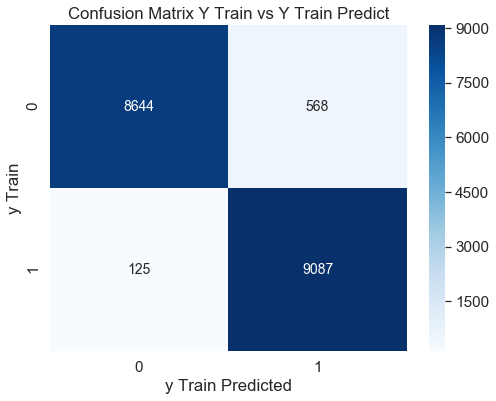

In [95]:
data = confusion_matrix(y_train, y_pred_train)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'y Train'
df_cm.columns.name = 'y Train Predicted'
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14},fmt='d')# font size
plt.title("Confusion Matrix Y Train vs Y Train Predict")
plt.show()

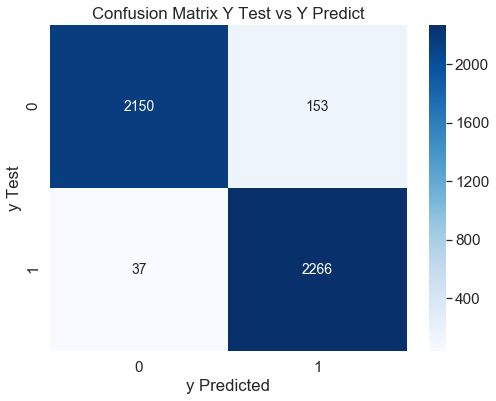

In [96]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'y Test'
df_cm.columns.name = 'y Predicted'
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14},fmt='d')# font size
plt.title("Confusion Matrix Y Test vs Y Predict")
plt.show()

In [97]:
roc_auc_score(y_test, y_pred)

0.9587494572297005

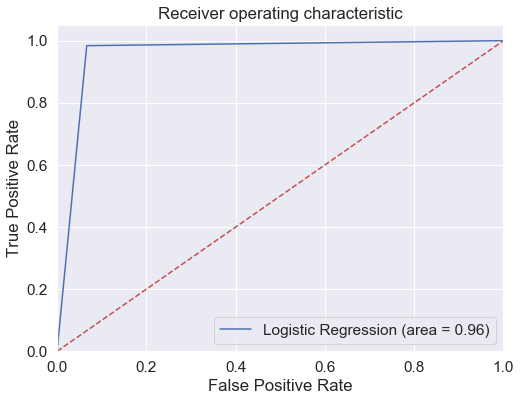

In [98]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Feature Importance

In [99]:
rfc_best.feature_importances_

array([0.00773404, 0.00381569, 0.00104083, 0.00178033, 0.0919729 ,
       0.00721894, 0.01142727, 0.02396093, 0.00436407, 0.0183907 ,
       0.04186968, 0.01352491, 0.02437054, 0.00457354, 0.11616071,
       0.01236572, 0.60412649, 0.0065275 , 0.00477521])

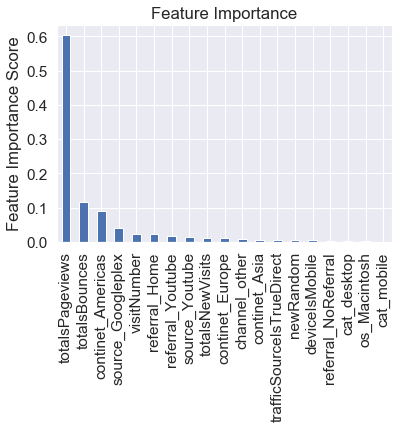

In [100]:
plot_feat_imp(rfc_best,20,df_downsampled.columns)

In [101]:
print_feat_imp(rfc_best,df_downsampled)

,Importance,Feature
0,0.6041,totalsPageviews
1,0.1162,totalsBounces
2,0.0920,continet_Americas
3,0.0419,source_Googleplex
4,0.0244,visitNumber
5,0.0240,referral_Home
6,0.0184,referral_Youtube
7,0.0135,source_Youtube
8,0.0124,totalsNewVisits
9,0.0114,continet_Europe


**CONCLUSIONS:**<br>
* The AUC, CM and F1 have given very good results.<br>
* The Pageviews, Bounces and the continent to be America have a 85% of importance in the model.<br>
* The column random is the 13th feature in importance, the rest of the columns can be avoided.

**IMPROVEMENTS:**<br>
* Take out the columns that perform under the random var, ti make the model more efficient

### Model Improvement Seccond Attemp

#### Classification Tree: Random Forrest - IMPROVEMENT 2

##### **DROP THE COLUMNS PERFORMING UNDER THE RANDOM**

In [102]:
drop_columns = ['deviceIsMobile','referral_NoReferral',
'cat_desktop','os_Macintosh','cat_mobile']

In [103]:
df_downsampled.drop(columns=drop_columns, inplace=True)

In [104]:
df_downsampled.head()

,channel_other,continet_Americas,continet_Asia,continet_Europe,referral_Home,referral_Youtube,source_Googleplex,source_Youtube,visitNumber,totalsBounces,totalsNewVisits,totalsPageviews,trafficSourceIsTrueDirect,newRandom,newConversion
0,0,1,0,0,0,0,0,0,2,0,0,7,0,0.722360,0
1,1,0,1,0,0,1,0,1,1,1,1,1,0,0.062462,0
2,1,1,0,0,0,1,0,1,1,1,1,1,0,0.041381,0
3,1,0,0,1,0,1,0,1,1,1,1,1,0,0.452090,0
4,0,0,1,0,0,0,0,0,1,1,1,1,0,0.542287,0


In [105]:
df_downsampled.shape

(23030, 15)

#### Split dataframe

In [106]:
X = df_downsampled.iloc[:,:-1]
y = df_downsampled.iloc[:,-1:]

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y, test_size=0.2, random_state=10)

##### **STANDARIZE THE VARS**

In [108]:
# Define the scaler with the Train data 
scaler = StandardScaler().fit(X_train)

In [109]:
# Scale the train set
X_train = scaler.transform(X_train)

In [110]:
# Scale the test set
X_test = scaler.transform(X_test)

#### Search Grid Cross Validation

In [111]:
rfc = RandomForestClassifier(random_state=10)

In [112]:
#Current parameters of Random Forrest Classifier
print(rfc.get_params())

{'bootstrap': True, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 'warn', 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}


I'll use the best parameters in the improved model

##### First Atempt

In [113]:
param_grid = { 
    'n_estimators': [35,40,45],
    'max_features': ['auto'],
    'max_depth' : [7,8,9],
    'bootstrap' : [False],
    'criterion': ['gini']   
}

In [114]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [115]:
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [116]:
CV_rfc.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'n_estimators': 40}

The parameters still the same that in the previous atempt, so I stick with them.

In [118]:
rfc_best=RandomForestClassifier(random_state=10, max_features=CV_rfc.best_params_['max_features'], n_estimators=CV_rfc.best_params_['n_estimators'], max_depth=CV_rfc.best_params_['max_depth'], criterion=CV_rfc.best_params_['criterion'], bootstrap=CV_rfc.best_params_['bootstrap'])


In [119]:
rfc_best.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [120]:
y_pred_train=rfc_best.predict(X_train)

In [121]:
y_pred=rfc_best.predict(X_test)

In [122]:
f1_score(y_train, y_pred_train)

0.9627904514899699

In [123]:
f1_score(y_test, y_pred)

0.959425190194421

In [124]:
cm = confusion_matrix(y_train, y_pred_train)
cm

array([[8626,  586],
       [ 117, 9095]])

In [125]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2144,  159],
       [  33, 2270]])

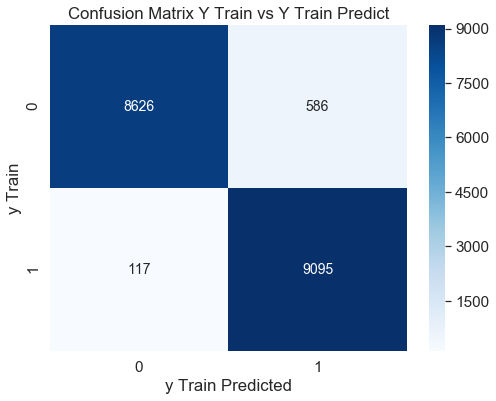

In [126]:
data = confusion_matrix(y_train, y_pred_train)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'y Train'
df_cm.columns.name = 'y Train Predicted'
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14},fmt='d')# font size
plt.title("Confusion Matrix Y Train vs Y Train Predict")
plt.show()

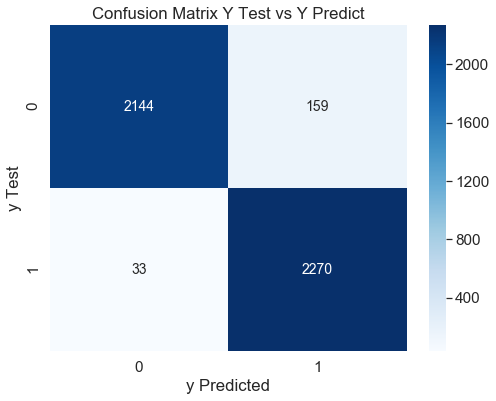

In [127]:
data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'y Test'
df_cm.columns.name = 'y Predicted'
plt.figure(figsize = (8,6))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 14},fmt='d')# font size
plt.title("Confusion Matrix Y Test vs Y Predict")
plt.show()

In [128]:
roc_auc_score(y_test, y_pred)

0.958315240990013

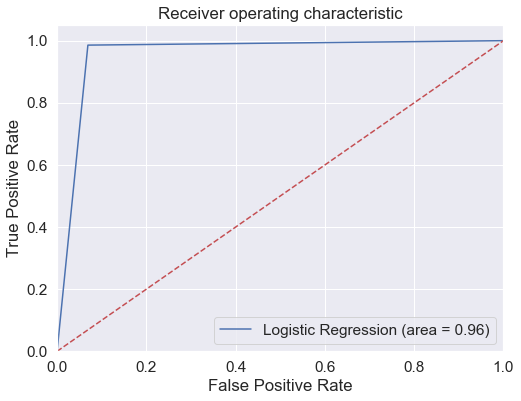

In [129]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### Feature Importance

In [130]:
rfc_best.feature_importances_

array([0.00541746, 0.08562158, 0.00858523, 0.00598695, 0.02589554,
       0.02325729, 0.02813413, 0.01667801, 0.01611951, 0.14103182,
       0.02802991, 0.60560432, 0.00441327, 0.00522496])

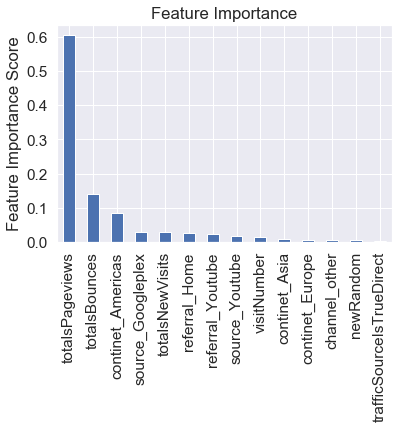

In [131]:
plot_feat_imp(rfc_best,20,df_downsampled.columns)

In [132]:
print_feat_imp(rfc_best,df_downsampled)

,Importance,Feature
0,0.6056,totalsPageviews
1,0.1410,totalsBounces
2,0.0856,continet_Americas
3,0.0281,source_Googleplex
4,0.0280,totalsNewVisits
5,0.0259,referral_Home
6,0.0233,referral_Youtube
7,0.0167,source_Youtube
8,0.0161,visitNumber
9,0.0086,continet_Asia


**CONCLUSIONS:**<br>
* The AUC, CM and F1 have given very good results.<br>
* The Pageviews, Bounces and the continent to be America have a 85% of importance in the model.<br>
* We'v got a very similar model in results, and much more light in performance